In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pyLDAvis 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade ipykernel

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pickle5

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)



C:\Users\Dell\anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
dfin_clean = pd.read_csv("dfin_clean.csv", 
                 index_col=False,
                        low_memory = False)
print(dfin_clean)

        Unnamed: 0               review_id                 user_id  \
0                0  Gi5LSRmTXoL9Bp4jNGPjLw  hn0ZbitvmlHnF--KJGJ6_A   
1                1  egHMQBhFeaLhVyC6w3r0vQ  HvpNr0ohHCaVLp014CQrdw   
2                2  GDgXjXSZCA1iNQWD7OHXfg  1RCRKuHgP3FskGUVnmFdxg   
3                3  WxrK52MRJy6Cxk_vOJeD1Q  9d22a-5XXvsZ55p04gI5jA   
4                4  GgWFjRHhelaiUgR2-H6N4g  pRPT3vqhqpU7kHgmKJamvw   
...            ...                     ...                     ...   
214869      214869  Mc6gBUoqj8VNyGHBOTIPCw  _XXa8CyI4uKOdu6RRbWE4g   
214870      214870  jDMk2EEGG-fkuA2rnCr0zg  KTgetFhipsOG1vWfVuSaiA   
214871      214871  MbmrN5q_JKkokjOdqLXxhQ  SF2Hu55kX9QJDvZETuZ9eg   
214872      214872  2n2PbNLYlQSRs88VrZtrGg  _BwuIa1-qjIL1PdYB_awyA   
214873      214873  sjSj7jSR7qncgIpO-vtitA  _N50LtqyuBHCHvFpaPv7tw   

                   business_id  stars_x  useful_x  funny_x  cool_x  \
0       TA1KUSCu8GkWP9w0rmElxw        4         0        0       0   
1       gGvNgShkset

In [3]:
dfin_clean['business_id'].nunique()

356

In [4]:
dfin_clean['lemma_str'] = [' '.join(map(str,l)) for l in dfin_clean['lemmatized']]
print(dfin_clean)

        Unnamed: 0               review_id                 user_id  \
0                0  Gi5LSRmTXoL9Bp4jNGPjLw  hn0ZbitvmlHnF--KJGJ6_A   
1                1  egHMQBhFeaLhVyC6w3r0vQ  HvpNr0ohHCaVLp014CQrdw   
2                2  GDgXjXSZCA1iNQWD7OHXfg  1RCRKuHgP3FskGUVnmFdxg   
3                3  WxrK52MRJy6Cxk_vOJeD1Q  9d22a-5XXvsZ55p04gI5jA   
4                4  GgWFjRHhelaiUgR2-H6N4g  pRPT3vqhqpU7kHgmKJamvw   
...            ...                     ...                     ...   
214869      214869  Mc6gBUoqj8VNyGHBOTIPCw  _XXa8CyI4uKOdu6RRbWE4g   
214870      214870  jDMk2EEGG-fkuA2rnCr0zg  KTgetFhipsOG1vWfVuSaiA   
214871      214871  MbmrN5q_JKkokjOdqLXxhQ  SF2Hu55kX9QJDvZETuZ9eg   
214872      214872  2n2PbNLYlQSRs88VrZtrGg  _BwuIa1-qjIL1PdYB_awyA   
214873      214873  sjSj7jSR7qncgIpO-vtitA  _N50LtqyuBHCHvFpaPv7tw   

                   business_id  stars_x  useful_x  funny_x  cool_x  \
0       TA1KUSCu8GkWP9w0rmElxw        4         0        0       0   
1       gGvNgShkset

In [5]:
dfin_clean['sentiment'] = dfin_clean['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
dfin_clean.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
0,0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really good food and service both times. I got a burger with...,2011-10-27 14:32:57,...,I have been here twice and have had really good food and service both times. I got a burger with...,"['I', 'have', 'been', 'here', 'twice', 'and', 'have', 'had', 'really', 'good', 'food', 'and', 's...","['i', 'have', 'been', 'here', 'twice', 'and', 'have', 'had', 'really', 'good', 'food', 'and', 's...","['i', 'have', 'been', 'here', 'twice', 'and', 'have', 'had', 'really', 'good', 'food', 'and', 's...","['twice', 'really', 'good', 'food', 'service', 'times', 'got', 'burger', 'caramelized', 'onions'...","[('twice', 'RB'), ('really', 'RB'), ('good', 'JJ'), ('food', 'NN'), ('service', 'NN'), ('times',...","[('twice', 'r'), ('really', 'r'), ('good', 'a'), ('food', 'n'), ('service', 'n'), ('times', 'n')...","['twice', 'really', 'good', 'food', 'service', 'time', 'get', 'burger', 'caramelize', 'onion', '...","[ ' t w i c e ' , ' r e a l l y ' , ' g o o d ' , ' f o o d ' , ' s e r v i c e ' , ' ...",0.0
1,1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down at the bar while my boyfriend parked the car. Alt...,2015-10-04 05:37:01,...,Quickly stopped in for a UFC fight. I sat down at the bar while my boyfriend parked the car. Alt...,"['Quickly', 'stopped', 'in', 'for', 'a', 'UFC', 'fight', '.', 'I', 'sat', 'down', 'at', 'the', '...","['quickly', 'stopped', 'in', 'for', 'a', 'ufc', 'fight', '.', 'i', 'sat', 'down', 'at', 'the', '...","['quickly', 'stopped', 'in', 'for', 'a', 'ufc', 'fight', 'i', 'sat', 'down', 'at', 'the', 'bar',...","['quickly', 'stopped', 'ufc', 'fight', 'sat', 'bar', 'boyfriend', 'parked', 'car', 'although', '...","[('quickly', 'RB'), ('stopped', 'VBD'), ('ufc', 'JJ'), ('fight', 'NN'), ('sat', 'VBD'), ('bar', ...","[('quickly', 'r'), ('stopped', 'v'), ('ufc', 'a'), ('fight', 'n'), ('sat', 'v'), ('bar', 'n'), (...","['quickly', 'stop', 'ufc', 'fight', 'sit', 'bar', 'boyfriend', 'park', 'car', 'although', 'resta...","[ ' q u i c k l y ' , ' s t o p ' , ' u f c ' , ' f i g h t ' , ' s i t ' , ' b a r ' ...",0.0
2,2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than their Pho's. Also I really like their sandwiches a...,2017-05-26 03:05:46,...,I think their rice dishes are way better than their Pho's. Also I really like their sandwiches a...,"['I', 'think', 'their', 'rice', 'dishes', 'are', 'way', 'better', 'than', 'their', 'Pho', ""'s"", ...","['i', 'think', 'their', 'rice', 'dishes', 'are', 'way', 'better', 'than', 'their', 'pho', ""'s"", ...","['i', 'think', 'their', 'rice', 'dishes', 'are', 'way', 'better', 'than', 'their', 'pho', ""'s"", ...","['think', 'rice', 'dishes', 'way', 'better', 'pho', ""'s"", 'also', 'really', 'like', 'sandwiches'...","[('think', 'VB'), ('rice', 'NN'), ('dishes', 'NNS'), ('way', 'NN'), ('better', 'RBR'), ('pho', '...","[('think', 'v'), ('rice', 'n'), ('dishes', 'n'), ('way', 'n'), ('better', 'r'), ('pho', 'n'), (""...","['think', 'rice', 'dish', 'way', 'well', 'pho', ""'s"", 'also', 'really', 'like', 'sandwich', 'spr...","[ ' t h i n k ' , ' r i c e ' , ' d i s h ' , ' w a y ' , ' w e l l ' , ' p h o ' , ...",0.0
3,3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were greeted by a number of staff members as we checke...",2017-09-20 15:38:27,...,"When we first arrived at the Coco Key, we were greeted by a number of staff members as we checke...","['When', 'we', 'first', 'arrived', 'at', 'the', 'Coco', 'Key', ',', 'we', 'were', 'greeted', 'by...","['when', 'we', 'first', 'arrived', 'at'

In [ ]:
dfin_cleanl['sentiment'] = dfin_clean['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
dfin_cleanl.head()

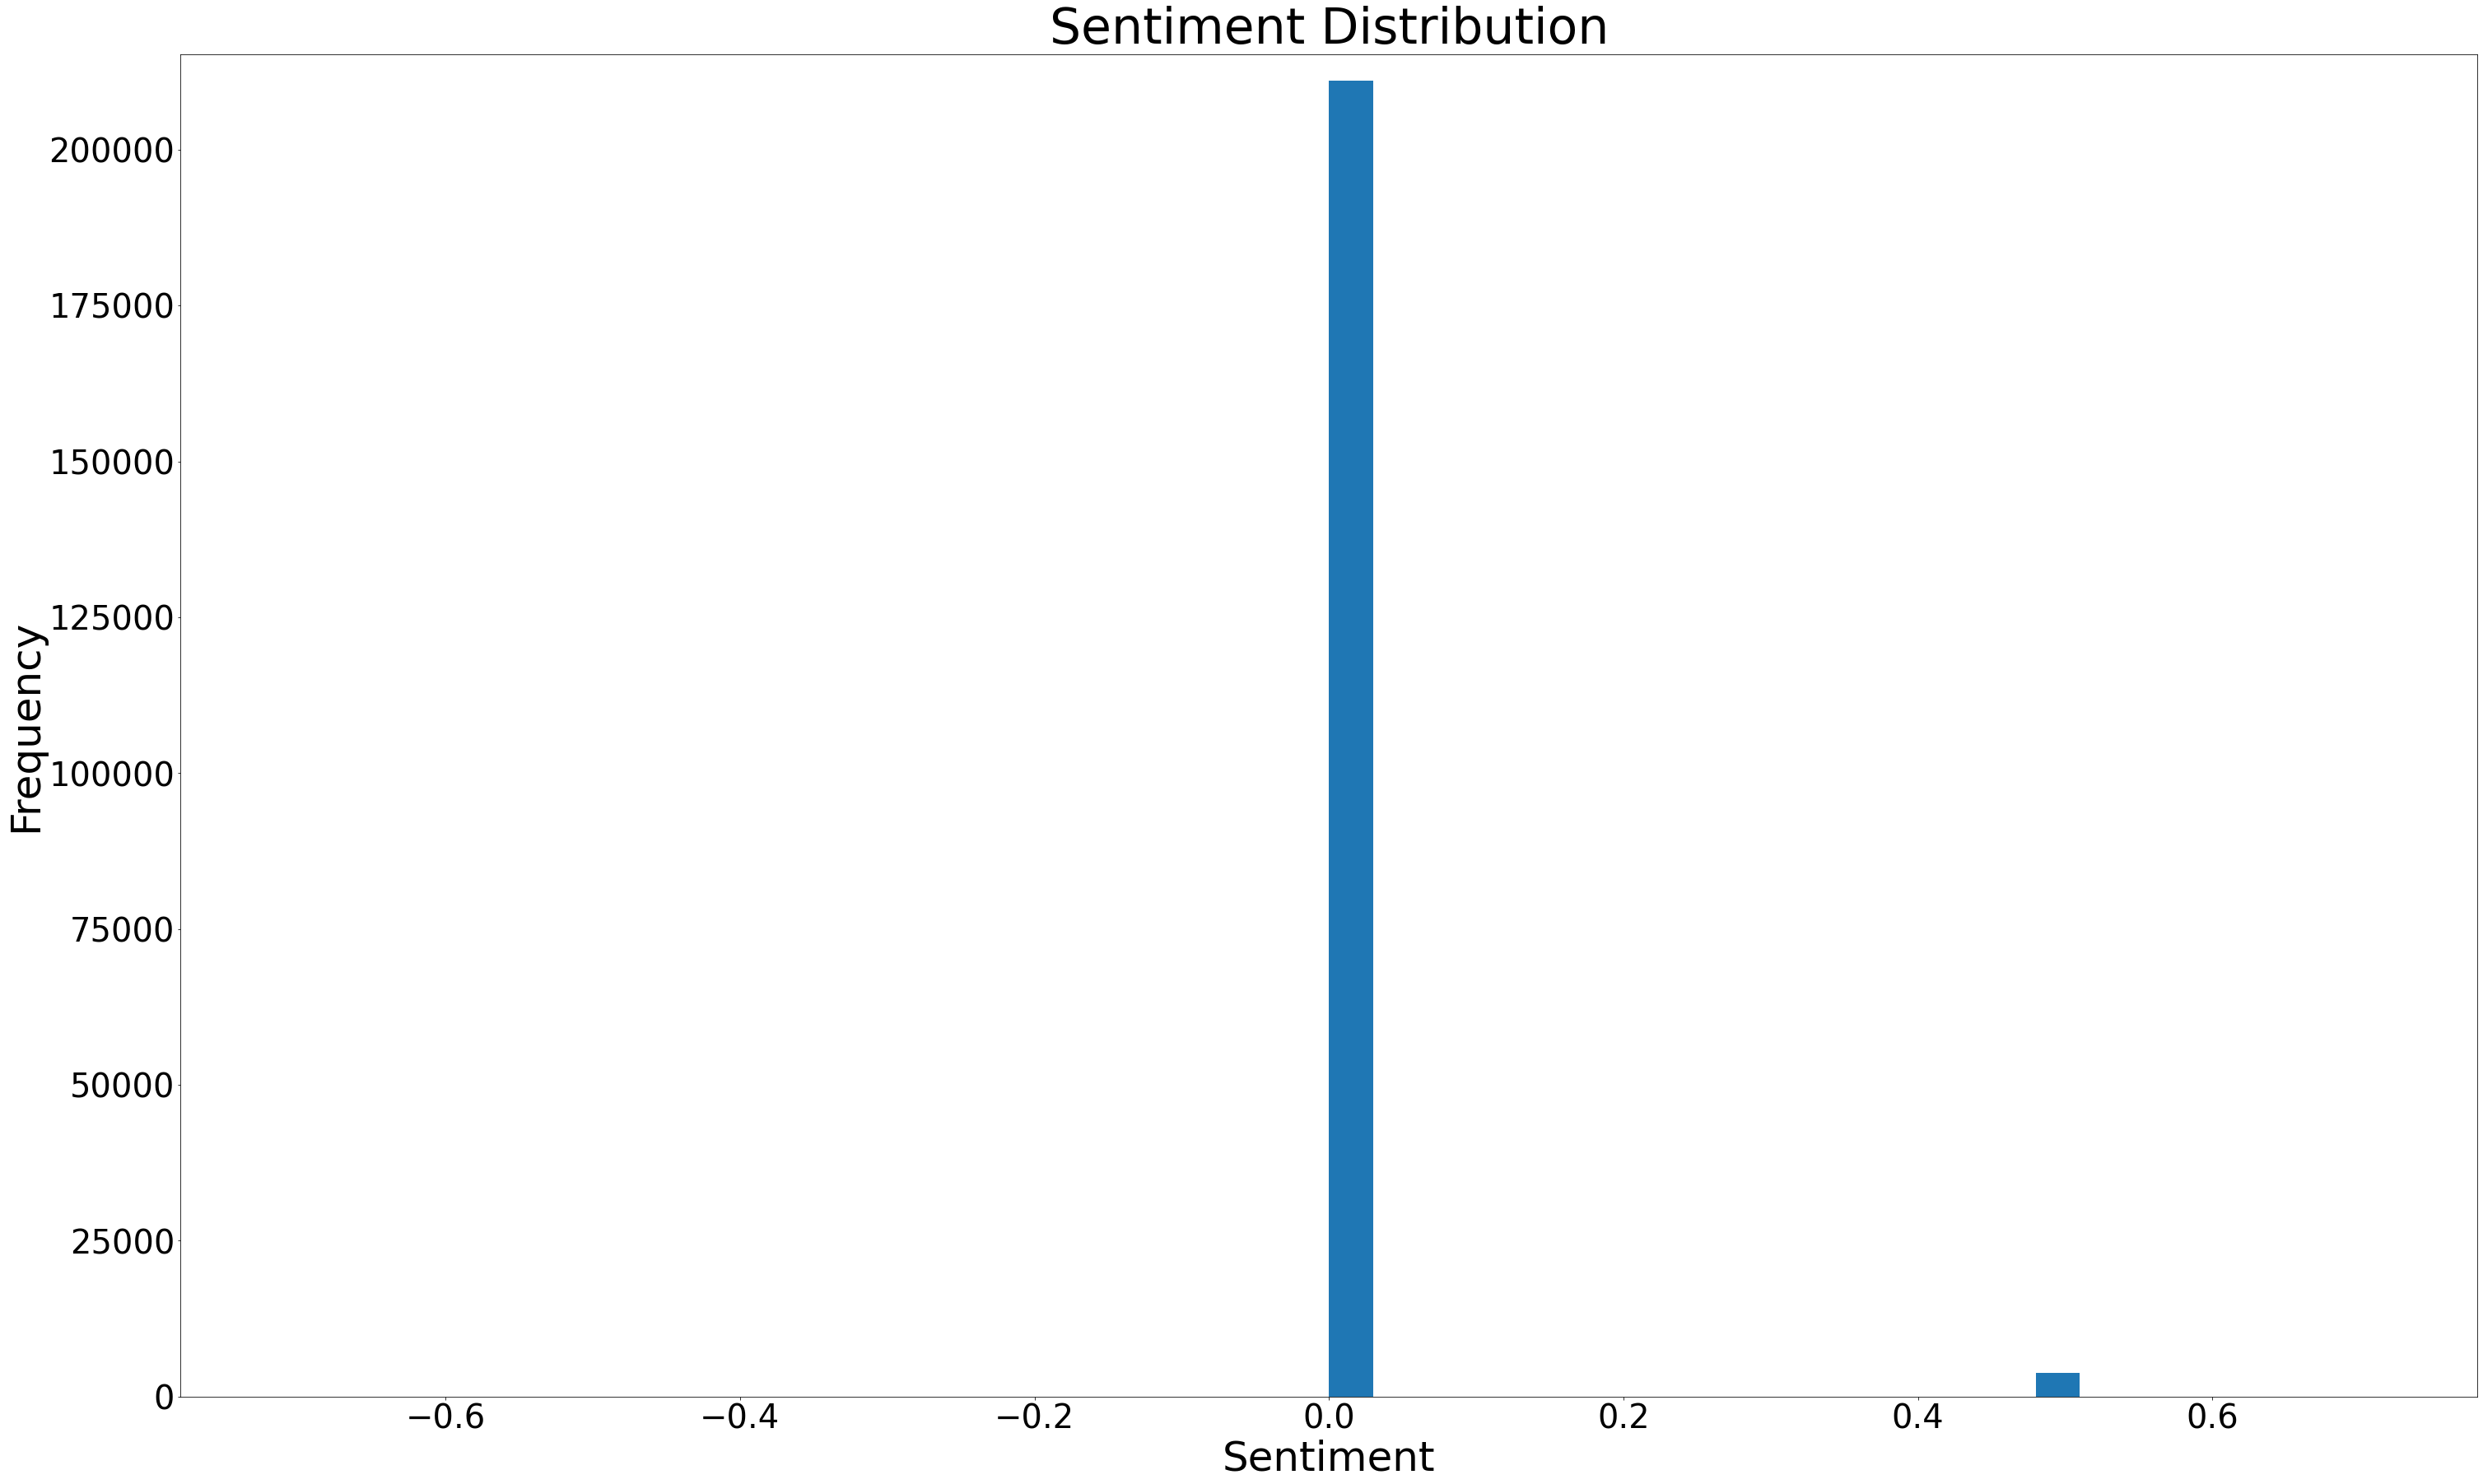

In [7]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(dfin_clean['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [15]:
dsorted = dfin_clean.sort_values(by='sentiment')


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
54370,54370,Crp_2VyrwlcObfV9gbZboQ,sr2pTeBbehzepVkzUXft7Q,IdXHHEUH4ebcxdRxCo3JNw,3,1,0,0,"The food was delicious! I got the Shrimp n Grits, and my girlfriend got the fried chicken. Altho...",2014-06-16 23:45:31,...,"The food was delicious! I got the Shrimp n Grits, and my girlfriend got the fried chicken. Altho...","['The', 'food', 'was', 'delicious', '!', 'I', 'got', 'the', 'Shrimp', 'n', 'Grits', ',', 'and', ...","['the', 'food', 'was', 'delicious', '!', 'i', 'got', 'the', 'shrimp', 'n', 'grits', ',', 'and', ...","['the', 'food', 'was', 'delicious', 'i', 'got', 'the', 'shrimp', 'n', 'grits', 'and', 'my', 'gir...","['food', 'delicious', 'got', 'shrimp', 'n', 'grits', 'girlfriend', 'got', 'fried', 'chicken', 'a...","[('food', 'NN'), ('delicious', 'JJ'), ('got', 'VBD'), ('shrimp', 'JJ'), ('n', 'JJ'), ('grits', '...","[('food', 'n'), ('delicious', 'a'), ('got', 'v'), ('shrimp', 'a'), ('n', 'a'), ('grits', 'n'), (...","['food', 'delicious', 'get', 'shrimp', 'n', 'grit', 'girlfriend', 'get', 'fried', 'chicken', 'al...","[ ' f o o d ' , ' d e l i c i o u s ' , ' g e t ' , ' s h r i m p ' , ' n ' , ' g r i ...",-0.75
64425,64425,TpBzLr2bj-gjgRHqwbrN7g,QfbfLxRn7NMalEyc2AMQnw,S9NvWyHUPsuYK7ObMV43pA,3,1,0,0,"meh. Maybe I got the wrong thing - Fish Tibs with Shiro, right? People raved about it, but I fou...",2011-04-02 02:08:50,...,"meh. Maybe I got the wrong thing - Fish Tibs with Shiro, right? People raved about it, but I fou...","['meh', '.', 'Maybe', 'I', 'got', 'the', 'wrong', 'thing', '-', 'Fish', 'Tibs', 'with', 'Shiro',...","['meh', '.', 'maybe', 'i', 'got', 'the', 'wrong', 'thing', '-', 'fish', 'tibs', 'with', 'shiro',...","['meh', 'maybe', 'i', 'got', 'the', 'wrong', 'thing', 'fish', 'tibs', 'with', 'shiro', 'right', ...","['meh', 'maybe', 'got', 'wrong', 'thing', 'fish', 'tibs', 'shiro', 'right', 'people', 'raved', '...","[('meh', 'NN'), ('maybe', 'RB'), ('got', 'VBD'), ('wrong', 'JJ'), ('thing', 'NN'), ('fish', 'JJ'...","[('meh', 'n'), ('maybe', 'r'), ('got', 'v'), ('wrong', 'a'), ('thing', 'n'), ('fish', 'a'), ('ti...","['meh', 'maybe', 'get', 'wrong', 'thing', 'fish', 'tib', 'shiro', 'right', 'people', 'rave', 'fo...","[ ' m e h ' , ' m a y b e ' , ' g e t ' , ' w r o n g ' , ' t h i n g ' , ' f i s h ' ...",-0.75
213829,213829,v7_xjZw38432l-LX2JZ2_g,Eu0e8t98Ldh9X9Q9BS6q9A,1E_JFdI6HfEhh3T_qvO_jw,2,3,0,0,"SERVICE: FUNNY, NOT!\nMy friends and I thought it was hilarious that the waitress we had wasn't ...",2013-10-07 20:58:16,...,"SERVICE: FUNNY, NOT! My friends and I thought it was hilarious that the waitress we had was not ...","['SERVICE', ':', 'FUNNY', ',', 'NOT', '!', 'My', 'friends', 'and', 'I', 'thought', 'it', 'was', ...","['service', ':', 'funny', ',', 'not', '!', 'my', 'friends', 'and', 'i', 'thought', 'it', 'was', ...","['service', 'funny', 'not', 'my', 'friends', 'and', 'i', 'thought', 'it', 'was', 'hilarious', 't...","['service', 'funny', 'friends', 'thought', 'hilarious', 'waitress', 'sufficient', 'caring', 'ser...","[('service', 'NN'), ('funny', 'JJ'), ('friends', 'NNS'), ('thought', 'VBN'), ('hilarious', 'JJ')...","[('service', 'n'), ('funny', 'a'), ('friends', 'n'), ('thought', 'v'), ('hilarious', 'a'), ('wai...","['service', 'funny', 'friend', 'think', 'hilarious', 'waitress', 'sufficient', 'care', 'service'...","[ ' s e r v i c e ' , ' f u n n y ' , ' f r i e n d ' , ' t h i n k ' , ' h i l a r i o ...",-0.75
47167,47167,ppmHvt6evcM3U4oVQIcysA,yBkPu1ixpZt8lM4YhHC1lg,ods77_L7AjlkvGqR79ndzQ,2,2,2,2,Game 6 for the Celts.\n\nWaittress was incredibly nice. Warned us NOT to get the portabello bur...,2008-06-18 19:08:17,...,Game 6 for the Celts. Waittress was incredibly nice. Warned us NOT to get the portabello burger ...,"['Game', '6', 'for', 'the', 'Celts', '.', 'Waittress', 'was', 'incredibly', 'nice', '.', 'Warned...",

In [16]:
dsorted.head(25)

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,text_upr_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
54370,54370,Crp_2VyrwlcObfV9gbZboQ,sr2pTeBbehzepVkzUXft7Q,IdXHHEUH4ebcxdRxCo3JNw,3,1,0,0,"The food was delicious! I got the Shrimp n Grits, and my girlfriend got the fried chicken. Altho...",2014-06-16 23:45:31,...,"The food was delicious! I got the Shrimp n Grits, and my girlfriend got the fried chicken. Altho...","['The', 'food', 'was', 'delicious', '!', 'I', 'got', 'the', 'Shrimp', 'n', 'Grits', ',', 'and', ...","['the', 'food', 'was', 'delicious', '!', 'i', 'got', 'the', 'shrimp', 'n', 'grits', ',', 'and', ...","['the', 'food', 'was', 'delicious', 'i', 'got', 'the', 'shrimp', 'n', 'grits', 'and', 'my', 'gir...","['food', 'delicious', 'got', 'shrimp', 'n', 'grits', 'girlfriend', 'got', 'fried', 'chicken', 'a...","[('food', 'NN'), ('delicious', 'JJ'), ('got', 'VBD'), ('shrimp', 'JJ'), ('n', 'JJ'), ('grits', '...","[('food', 'n'), ('delicious', 'a'), ('got', 'v'), ('shrimp', 'a'), ('n', 'a'), ('grits', 'n'), (...","['food', 'delicious', 'get', 'shrimp', 'n', 'grit', 'girlfriend', 'get', 'fried', 'chicken', 'al...","[ ' f o o d ' , ' d e l i c i o u s ' , ' g e t ' , ' s h r i m p ' , ' n ' , ' g r i ...",-0.750
64425,64425,TpBzLr2bj-gjgRHqwbrN7g,QfbfLxRn7NMalEyc2AMQnw,S9NvWyHUPsuYK7ObMV43pA,3,1,0,0,"meh. Maybe I got the wrong thing - Fish Tibs with Shiro, right? People raved about it, but I fou...",2011-04-02 02:08:50,...,"meh. Maybe I got the wrong thing - Fish Tibs with Shiro, right? People raved about it, but I fou...","['meh', '.', 'Maybe', 'I', 'got', 'the', 'wrong', 'thing', '-', 'Fish', 'Tibs', 'with', 'Shiro',...","['meh', '.', 'maybe', 'i', 'got', 'the', 'wrong', 'thing', '-', 'fish', 'tibs', 'with', 'shiro',...","['meh', 'maybe', 'i', 'got', 'the', 'wrong', 'thing', 'fish', 'tibs', 'with', 'shiro', 'right', ...","['meh', 'maybe', 'got', 'wrong', 'thing', 'fish', 'tibs', 'shiro', 'right', 'people', 'raved', '...","[('meh', 'NN'), ('maybe', 'RB'), ('got', 'VBD'), ('wrong', 'JJ'), ('thing', 'NN'), ('fish', 'JJ'...","[('meh', 'n'), ('maybe', 'r'), ('got', 'v'), ('wrong', 'a'), ('thing', 'n'), ('fish', 'a'), ('ti...","['meh', 'maybe', 'get', 'wrong', 'thing', 'fish', 'tib', 'shiro', 'right', 'people', 'rave', 'fo...","[ ' m e h ' , ' m a y b e ' , ' g e t ' , ' w r o n g ' , ' t h i n g ' , ' f i s h ' ...",-0.750
213829,213829,v7_xjZw38432l-LX2JZ2_g,Eu0e8t98Ldh9X9Q9BS6q9A,1E_JFdI6HfEhh3T_qvO_jw,2,3,0,0,"SERVICE: FUNNY, NOT!\nMy friends and I thought it was hilarious that the waitress we had wasn't ...",2013-10-07 20:58:16,...,"SERVICE: FUNNY, NOT! My friends and I thought it was hilarious that the waitress we had was not ...","['SERVICE', ':', 'FUNNY', ',', 'NOT', '!', 'My', 'friends', 'and', 'I', 'thought', 'it', 'was', ...","['service', ':', 'funny', ',', 'not', '!', 'my', 'friends', 'and', 'i', 'thought', 'it', 'was', ...","['service', 'funny', 'not', 'my', 'friends', 'and', 'i', 'thought', 'it', 'was', 'hilarious', 't...","['service', 'funny', 'friends', 'thought', 'hilarious', 'waitress', 'sufficient', 'caring', 'ser...","[('service', 'NN'), ('funny', 'JJ'), ('friends', 'NNS'), ('thought', 'VBN'), ('hilarious', 'JJ')...","[('service', 'n'), ('funny', 'a'), ('friends', 'n'), ('thought', 'v'), ('hilarious', 'a'), ('wai...","['service', 'funny', 'friend', 'think', 'hilarious', 'waitress', 'sufficient', 'care', 'service'...","[ ' s e r v i c e ' , ' f u n n y ' , ' f r i e n d ' , ' t h i n k ' , ' h i l a r i o ...",-0.750
47167,47167,ppmHvt6evcM3U4oVQIcysA,yBkPu1ixpZt8lM4YhHC1lg,ods77_L7AjlkvGqR79ndzQ,2,2,2,2,Game 6 for the Celts.\n\nWaittress was incredibly nice. Warned us NOT to get the portabello bur...,2008-06-18 19:08:17,...,Game 6 for the Celts. Waittress was incredibly nice. Warned us NOT to get the portabello burger ...,"['Game', '6', 'for', 'the', 'Celts', '.', 'Waittress', 'was', 'incredibly', 'nice', '.', 'Warned..

In [26]:
pip install vaderSentiment

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
vsupr = analyzer.polarity_scores(dfin_clean['lemma_str'])
print("{:-<65} {}".format(dfin_clean['lemma_str'], str(vsupr)))